In [27]:
##Import
import glob, os
from Bio import SeqIO
import pandas as pd
from collections import Counter
import fuzzysearch
import matplotlib as plt
plt.rcParams['pdf.fonttype'] = 42

In [28]:
##Load key of conditions and files
samples = pd.read_excel("double_edit_placement.xls")

In [29]:
samples

,Phage,Gene,Plasmid,Direction,edit name 1,edit name 2,Genome Position,WT nt 1,Edited nt 1,WT nt 2,...,L_inside 1,R_inside 1,L_inside 2,R_inside 2,L_outside,R_outside,Rep1,Rep2,Rep3,Rep4
0,Lambda,L,pCF.62,R,C4T,C46T,NaN,C,T,C,...,CGTCCGATAT,ACGAANGATA,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-01,msSBK-33-23,msSBK-33-45,msSBK-33-67
1,Lambda,L,pCF.63,R,G10A,C46T,NaN,G,A,C,...,ATATNACGAA,GATAAATGNA,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-02,msSBK-33-24,msSBK-33-46,msSBK-33-68
2,Lambda,L,pCF.64,R,C19T,C46T,NaN,C,T,C,...,ANGATAAATG,AGCAAATGNC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-03,msSBK-33-25,msSBK-33-47,msSBK-33-69
3,Lambda,L,pCF.65,R,C28T,C46T,NaN,C,T,C,...,GNAGCAAATG,CTGAGCGGNT,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-04,msSBK-33-26,msSBK-33-48,msSBK-33-70
4,Lambda,L,pCF.66,R,T37C,C46T,NaN,T,C,C,...,GNCTGAGCGG,TGTAAGTTNC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-05,msSBK-33-27,msSBK-33-49,msSBK-33-71
5,Lambda,L,pCF.67,R,C55T,C46T,NaN,C,T,C,...,TNCGCAATAA,GTCGGCAANT,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-06,msSBK-33-28,msSBK-33-50,msSBK-33-72
6,Lambda,L,pCF.68,R,C64T,C46T,NaN,C,T,C,...,ANGTCGGCAA,TTTGGCGGNT,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-07,msSBK-33-29,msSBK-33-51,msSBK-33-73
7,Lambda,L,pCF.69,R,C73T,C46T,NaN,C,T,C,...,ANTTTGGCGG,TTCCTTTCNA,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-08,msSBK-33-30,msSBK-33-52,msSBK-33-74
8,Lambda,L,pCF.70,R,C82T,C46T,NaN,C,T,C,...,GNTTCCTTTC,ATTAANAAAC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-09,msSBK-33-31,msSBK-33-53,NaN
9,Lambda,L,pCF.71,R,C88T,C46T,NaN,C,T,C,...,TTTCNATTAA,AAACTTTCGC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-10,msSBK-33-32,msSBK-33-54,msSBK-33-76


In [34]:
ls

Edit_site_analysis.ipynb           msSBK-33-32_S32_L001_R1_001.fastq
double_edit_placement.xls          msSBK-33-45_S45_L001_R1_001.fastq
msSBK-33-01_S1_L001_R1_001.fastq   msSBK-33-46_S46_L001_R1_001.fastq
msSBK-33-02_S2_L001_R1_001.fastq   msSBK-33-47_S47_L001_R1_001.fastq
msSBK-33-03_S3_L001_R1_001.fastq   msSBK-33-48_S48_L001_R1_001.fastq
msSBK-33-04_S4_L001_R1_001.fastq   msSBK-33-49_S49_L001_R1_001.fastq
msSBK-33-05_S5_L001_R1_001.fastq   msSBK-33-50_S50_L001_R1_001.fastq
msSBK-33-06_S6_L001_R1_001.fastq   msSBK-33-51_S51_L001_R1_001.fastq
msSBK-33-07_S7_L001_R1_001.fastq   msSBK-33-52_S52_L001_R1_001.fastq
msSBK-33-08_S8_L001_R1_001.fastq   msSBK-33-53_S53_L001_R1_001.fastq
msSBK-33-09_S9_L001_R1_001.fastq   msSBK-33-54_S54_L001_R1_001.fastq
msSBK-33-10_S10_L001_R1_001.fastq  msSBK-33-67_S67_L001_R1_001.fastq
msSBK-33-23_S23_L001_R1_001.fastq  msSBK-33-68_S68_L001_R1_001.fastq
msSBK-33-24_S24_L001_R1_001.fastq  msSBK-33-69_S69_L001_R1_001.fastq
msSBK-33-25_S25_L001_R1_001.fastq 

In [36]:
print ("="*60)
for file in glob.glob("msSBK-*-*"):
    fn = file.split("_S")[0]
    print (fn)

    print ("\ntrimming files\n")
    cmd = "sickle se -f {0} -t sanger \
            -o {1}_trimmed_R1.fastq".format(file, fn)
    os.system(cmd)    
    print ("="*60)


msSBK-33-71

trimming file names


FastQ records kept: 46086
FastQ records discarded: 0

msSBK-33-47

trimming file names


FastQ records kept: 60128
FastQ records discarded: 0

msSBK-33-27

trimming file names


FastQ records kept: 46921
FastQ records discarded: 2

msSBK-33-04

trimming file names


FastQ records kept: 74215
FastQ records discarded: 2

msSBK-33-08

trimming file names


FastQ records kept: 100229
FastQ records discarded: 2

msSBK-33-50

trimming file names


FastQ records kept: 57960
FastQ records discarded: 2

msSBK-33-30

trimming file names


FastQ records kept: 36865
FastQ records discarded: 1

msSBK-33-01

trimming file names


FastQ records kept: 52523
FastQ records discarded: 3

msSBK-33-52

trimming file names


FastQ records kept: 32027
FastQ records discarded: 0

msSBK-33-54

trimming file names


FastQ records kept: 33788
FastQ records discarded: 1

msSBK-33-09

trimming file names


FastQ records kept: 72871
FastQ records discarded: 0

msSBK-33-69

trimmin

In [37]:
##Globals
outcomes_dict = {}

In [38]:
n_edits = 2
c = ["fastq", "read", "frequency", "plasmid", "replicate"]
eds = ["edit nt {0}".format(i+1) for i in range(n_edits)]
c.extend(eds)
#print (eds)
df_reads = pd.DataFrame(columns=c)
display(df_reads)


,fastq,read,frequency,plasmid,replicate,edit nt 1,edit nt 2


In [40]:
"""
    for rep in ["Rep1","Rep2","Rep3"]:
        outcomes_dict[i][rep]= {'wt':0,'edited':0,'unmatched_region':0,'unmatched_edit_nt':0}
        all_reads_str = []
        read_counter = []
        fastq_reads = "./%s_trimmed.fastq" % samples[rep][i]
        try:
            for seq_record in SeqIO.parse(fastq_reads, "fastq"):
                all_reads_str.append(str(seq_record.seq))
            read_counter = Counter(all_reads_str)
            for read in read_counter:
                outcomes_dict[sample_i][rep][extract_and_match(read,i,rep)] += read_counter[read]
            print(samples[rep][i])
        except IOError: #this happens when a file is missing
            print("%s missing" % samples[rep][i])

"""


# modified seth fx
##Defs
def extract_and_match(read, L_out, R_out, L_in, R_in):
    left_outside = fuzzysearch.find_near_matches(L_out,read,max_l_dist=2)
    right_outside = fuzzysearch.find_near_matches(R_out,read,max_l_dist=2)
    if len(left_outside) == 1 and len(right_outside) == 1:
        left_inside = fuzzysearch.find_near_matches(L_in,read,max_l_dist=1)
        right_inside = fuzzysearch.find_near_matches(R_in,read,max_l_dist=1)
        if len(left_inside) == 1 and len(right_inside) == 1:
            #print (left_inside, right_inside)
            var_nt = read[left_inside[0].end:right_inside[0].start]
            #print (var_nt)
            return (var_nt)
        else:
            return ("no_inside_flanking")
    else:
        return ("no_outside_flanking")


for i in samples.index:
    sample_i = int(i)
    outcomes_dict[i] = {}
    for rep in ["Rep1","Rep2","Rep3","Rep4"]:
        print (rep)
        fq = samples[rep].iloc[i]
        plasmid = samples["Plasmid"].iloc[i]
        #print (fq, "potato") 
        
        outcomes_dict[fq]= {"no_inside_flanking":0,"no_outside_flanking":0}
        all_reads_str = []
        read_counter = []
        
        try:
        # files are ~ msSBK-33-28_trimmed_R1.fastq
            fastq_reads = glob.glob("{0}_trimmed_R1.fastq".format(fq))[0]
            print (fastq_reads)

            for seq_record in SeqIO.parse(fastq_reads, "fastq"):
                all_reads_str.append(str(seq_record.seq))
            read_counter = Counter(all_reads_str)
            
            for read in read_counter:
                
                mutation_list = []
                
                ## brand new stuff here
                
                for j in range(n_edits): # for each mutation position: 
                    mut_pos = j+1
                    # mut_pos is the position of the mutation
                    L_out = samples["L_outside"].iloc[i]
                    R_out = samples["R_outside"].iloc[i]
                    L_in = samples["L_inside {0}".format(mut_pos)].iloc[i]
                    R_in = samples["R_inside {0}".format(mut_pos)].iloc[i]
                    
                    # we want fx to return nucleotide!
                    
                    nucleotide = extract_and_match(read, L_out, R_out, L_in, R_in)
                    #print (nucleotide)
                    
                    if nucleotide == "no_outside_flanking":
                        outcomes_dict[fq]["no_outside_flanking"] += read_counter[read] 
                        
                    elif nucleotide == "no_inside_flanking":
                        outcomes_dict[fq]["no_inside_flanking"] += read_counter[read]
                    
                    elif nucleotide in ["A", "T", "C", "G"]:
                        mutation_list.append(nucleotide)
                
                #print (mutation_list)
                
                # ["c", "c"]
                
                if len(mutation_list) == n_edits:
                    row_ = pd.DataFrame([[fq, str(read), int(read_counter[read]), plasmid, rep]+mutation_list],
                                    columns=['fastq', 'read','frequency', "plasmid", "replicate"]+\
                                        [' '.join(i) for i in list(zip(['edit nt']*len(mutation_list), [str(j) for j in range(1, len(mutation_list)+1)]))])
                                        # [' '.join(i) for i in list(zip(['edit nt']*len(mutation_list), range(1, len(mutation_list)+1)))])
                
                    #print (row_)
                    df_reads = pd.concat([df_reads, row_])
                    
                
                
                #display(df_reads)
            print (outcomes_dict[fq])
                             
                    
            #outcomes_dict[sample_i][rep][extract_and_match(read,i,rep)] += read_counter[read]
            #print(samples[rep][i])
        except IOError: #this happens when a file is missing
            print("%s missing" % samples[rep][i])
            
        except IndexError:
            print ("missing file {0}".format(fq))

Rep1
msSBK-33-01_trimmed_R1.fastq
{'no_inside_flanking': 495, 'no_outside_flanking': 41648}
Rep2
msSBK-33-23_trimmed_R1.fastq
{'no_inside_flanking': 510, 'no_outside_flanking': 54216}
Rep3
msSBK-33-45_trimmed_R1.fastq
{'no_inside_flanking': 423, 'no_outside_flanking': 38570}
Rep4
msSBK-33-67_trimmed_R1.fastq
{'no_inside_flanking': 288, 'no_outside_flanking': 32914}
Rep1
msSBK-33-02_trimmed_R1.fastq
{'no_inside_flanking': 610, 'no_outside_flanking': 47494}
Rep2
msSBK-33-24_trimmed_R1.fastq
{'no_inside_flanking': 625, 'no_outside_flanking': 39404}
Rep3
msSBK-33-46_trimmed_R1.fastq
{'no_inside_flanking': 486, 'no_outside_flanking': 28348}
Rep4
msSBK-33-68_trimmed_R1.fastq
{'no_inside_flanking': 545, 'no_outside_flanking': 35230}
Rep1
msSBK-33-03_trimmed_R1.fastq
{'no_inside_flanking': 1462, 'no_outside_flanking': 37908}
Rep2
msSBK-33-25_trimmed_R1.fastq
{'no_inside_flanking': 845, 'no_outside_flanking': 43944}
Rep3
msSBK-33-47_trimmed_R1.fastq
{'no_inside_flanking': 1373, 'no_outside_flan

In [43]:
#df_reads.to_excel("double_edit_nt_output.xlsx")

In [45]:
# import json

# json = json.dumps(outcomes_dict)
# f = open("two_edits_outcomes_dict.json", "w")
# f.write(json)
# f.close()

In [46]:
print(len(df_reads))
display(df_reads)

83639


,fastq,read,frequency,plasmid,replicate,edit nt 1,edit nt 2
0,msSBK-33-01,CTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAAGGA...,3,pCF.62,Rep1,C,C
0,msSBK-33-01,GGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAAG...,193,pCF.62,Rep1,C,C
0,msSBK-33-01,CGGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAA...,22296,pCF.62,Rep1,C,C
0,msSBK-33-01,CGGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAA...,68,pCF.62,Rep1,C,C
0,msSBK-33-01,CGGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAA...,6,pCF.62,Rep1,C,T
...,...,...,...,...,...,...,...
0,msSBK-33-76,GGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAAG...,1,pCF.71,Rep4,C,C
0,msSBK-33-76,CGGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAA...,1,pCF.71,Rep4,C,C
0,msSBK-33-76,CGGCTGTCGCGGATGAATATGACCAGCCAACGTCAGATATCACGAA...,1,pCF.71,Rep4,C,T
0,msSBK-33-76,CGGCTGTCGCGGATGAATATGACCAGCCAACGTCCGATATCACGAA...,1,pCF.71,Rep4,C,C


In [47]:
samples

,Phage,Gene,Plasmid,Direction,edit name 1,edit name 2,Genome Position,WT nt 1,Edited nt 1,WT nt 2,...,L_inside 1,R_inside 1,L_inside 2,R_inside 2,L_outside,R_outside,Rep1,Rep2,Rep3,Rep4
0,Lambda,L,pCF.62,R,C4T,C46T,NaN,C,T,C,...,CGTCCGATAT,ACGAANGATA,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-01,msSBK-33-23,msSBK-33-45,msSBK-33-67
1,Lambda,L,pCF.63,R,G10A,C46T,NaN,G,A,C,...,ATATNACGAA,GATAAATGNA,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-02,msSBK-33-24,msSBK-33-46,msSBK-33-68
2,Lambda,L,pCF.64,R,C19T,C46T,NaN,C,T,C,...,ANGATAAATG,AGCAAATGNC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-03,msSBK-33-25,msSBK-33-47,msSBK-33-69
3,Lambda,L,pCF.65,R,C28T,C46T,NaN,C,T,C,...,GNAGCAAATG,CTGAGCGGNT,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-04,msSBK-33-26,msSBK-33-48,msSBK-33-70
4,Lambda,L,pCF.66,R,T37C,C46T,NaN,T,C,C,...,GNCTGAGCGG,TGTAAGTTNC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-05,msSBK-33-27,msSBK-33-49,msSBK-33-71
5,Lambda,L,pCF.67,R,C55T,C46T,NaN,C,T,C,...,TNCGCAATAA,GTCGGCAANT,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-06,msSBK-33-28,msSBK-33-50,msSBK-33-72
6,Lambda,L,pCF.68,R,C64T,C46T,NaN,C,T,C,...,ANGTCGGCAA,TTTGGCGGNT,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-07,msSBK-33-29,msSBK-33-51,msSBK-33-73
7,Lambda,L,pCF.69,R,C73T,C46T,NaN,C,T,C,...,ANTTTGGCGG,TTCCTTTCNA,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-08,msSBK-33-30,msSBK-33-52,msSBK-33-74
8,Lambda,L,pCF.70,R,C82T,C46T,NaN,C,T,C,...,GNTTCCTTTC,ATTAANAAAC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-09,msSBK-33-31,msSBK-33-53,NaN
9,Lambda,L,pCF.71,R,C88T,C46T,NaN,C,T,C,...,TTTCNATTAA,AAACTTTCGC,GNTGTAAGTT,CGCAATAANG,TATGACCAGCCAACGTCCGA,ACTTTCGCAGTAAATCCCAT,msSBK-33-10,msSBK-33-32,msSBK-33-54,msSBK-33-76


### to get the frequency of co-occurence of nucleotides at edit positions 1 & 2:

In [48]:
# # calculate descriptive stats of mutations of interest
# # C C; C T; T C; T T
# #df_reads = df_reads.reset_index()
# CC = df_reads[(df_reads["edit nt 1"]=="C") & (df_reads["edit nt 2"]=="C")].groupby(["plasmid", "replicate"])["frequency"].sum()
# #print (CC)

# sums = df_reads.groupby(["plasmid", "replicate"])["frequency"].sum()
# #print (sums)

# pct_CC = CC / sums * 100
# print (pct_CC)

plasmid  replicate
pCF.62   Rep1         91.596208
         Rep2         91.967806
         Rep3         93.472424
         Rep4         95.852466
pCF.63   Rep1          0.003017
         Rep2          0.010844
         Rep3          0.007818
         Rep4               NaN
pCF.64   Rep1         89.182517
         Rep2         92.012661
         Rep3         92.989379
         Rep4         92.325471
pCF.65   Rep1         90.148015
         Rep2         91.346796
         Rep3         92.384098
         Rep4         92.830408
pCF.66   Rep1          0.457362
         Rep2           0.44035
         Rep3          0.253816
         Rep4          0.331833
pCF.67   Rep1         89.054113
         Rep2         91.245927
         Rep3         93.469553
         Rep4         94.231264
pCF.68   Rep1         87.468113
         Rep2         89.091098
         Rep3         91.609021
         Rep4         93.875303
pCF.69   Rep1         90.184871
         Rep2          90.96543
         Rep3        

In [58]:
# define a dictionary of dictionaries, where the first level is the plasmid &
# the second-level are the wt & edited nucleotides for the two edits
plasmid_edit_dict = {}

for plasmid in samples["Plasmid"]:
    d_eds = {}
    for nb in range(n_edits):
        nb+=1 # this is the edit number
        edit = samples[samples["Plasmid"]==plasmid]["edit name {0}".format(nb)].tolist()[0]
        wt = edit[0]
        mut = edit[-1]
        d_eds["wt_{0}".format(nb)] = wt
        d_eds["mut_{0}".format(nb)] = mut
    plasmid_edit_dict[plasmid] = d_eds
print(plasmid_edit_dict)  

plasmid_edit_dict["wt_1"]

{'pCF.62': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.63': {'wt_1': 'G', 'mut_1': 'A', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.64': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.65': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.66': {'wt_1': 'T', 'mut_1': 'C', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.67': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.68': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.69': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.70': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}, 'pCF.71': {'wt_1': 'C', 'mut_1': 'T', 'wt_2': 'C', 'mut_2': 'T'}}


In [1]:
# [''.join(i) for i in zip(df["Year"].map(str),df["quarter"])]

df_reads["concat"]= ["".join(i) for i in list(zip(df_reads["edit nt 1"], df_reads["edit nt 2"]))]
#df_reads.groupby(["plasmid", "replicate"])["concat"].value_counts()
#df_reads.groupby(["plasmid"])["concat"].value_counts()# * df_reads.groupby(["concat"])["frequency"]

#print (df_reads.groupby(["plasmid", "concat"])["frequency"].sum())

top = df_reads.groupby(["plasmid", "concat", "replicate"])["frequency"].sum()

#print (df_reads.groupby(["plasmid"])["concat"].value_counts())

bottom = df_reads.groupby(["plasmid", "replicate"])["frequency"].sum()
#print (bottom)

edit_percent = pd.DataFrame(top / bottom * 100)
#display(edit_percent)


NameError: name 'df_reads' is not defined

In [119]:
all_plasmids_double_edit = pd.DataFrame(columns=['ee', 'ew', 'we', 'ww', 'plasmid', 'replicate']).set_index(["plasmid", "replicate"])

for plasmid in edit_percent.index.get_level_values(level=0).unique():
    ee = plasmid_edit_dict[plasmid]["mut_1"] + plasmid_edit_dict[plasmid]["mut_2"]
    ew = plasmid_edit_dict[plasmid]["mut_1"] + plasmid_edit_dict[plasmid]["wt_2"]
    we = plasmid_edit_dict[plasmid]["wt_1"] + plasmid_edit_dict[plasmid]["mut_2"]
    ww = plasmid_edit_dict[plasmid]["wt_1"] + plasmid_edit_dict[plasmid]["wt_2"]
    single_plasmid_df = edit_percent.loc[([plasmid]), :].copy().reset_index()
    single_plasmid_df['concat'].replace({ww: "ww", ee: "ee", we: "we", ew: "ew"}, inplace=True)
    single_plasmid_df_kept = single_plasmid_df.loc[(single_plasmid_df['concat'] == 'ww') |
                                                   (single_plasmid_df['concat'] == 'ee') |
                                                   (single_plasmid_df['concat'] == 'ew') |
                                                   (single_plasmid_df['concat'] == 'we'), :]
    single_plasmid_df_pivot = single_plasmid_df_kept.pivot(index=["plasmid", 'replicate'], columns='concat').droplevel(level=0, axis=1)

    # display (single_plasmid_df_pivot)

    all_plasmids_double_edit = pd.concat([all_plasmids_double_edit, single_plasmid_df_pivot]).fillna(0)

all_plasmids_double_edit = all_plasmids_double_edit.reset_index()

display(all_plasmids_double_edit)


# # save the dataframe for plotting (as excel)
#     print(plasmid)

,plasmid,replicate,ee,ew,we,ww
0,pCF.62,Rep1,0.461184,0.195363,7.673584,91.596208
1,pCF.62,Rep2,0.440231,0.140442,7.408308,91.967806
2,pCF.62,Rep3,0.436681,0.274947,5.790070,93.472424
3,pCF.62,Rep4,0.319425,0.159713,3.578559,95.852466
4,pCF.63,Rep1,2.537030,0.832604,7.300371,89.278711
5,pCF.63,Rep2,1.518219,0.506073,4.157027,93.757230
6,pCF.63,Rep3,2.161761,0.719284,4.581525,92.486611
7,pCF.63,Rep4,2.298473,0.756413,4.973325,91.935248
8,pCF.64,Rep1,4.981291,1.413574,4.365451,89.182517
9,pCF.64,Rep2,3.646304,1.011264,3.300995,92.012661


In [139]:
all_plasmids_double_edit.to_excel("all_plasmids_double_edit_output.xlsx")

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
#all_plasmids_double_edit.to_excel("all_plasmids_double_edit.xlsx")

In [136]:
stacked_bar_df_mean = all_plasmids_double_edit[["ee", "ew", "we", "plasmid", "replicate"]].set_index('plasmid').groupby("plasmid").mean()
stacked_bar_df_error = all_plasmids_double_edit[["ee", "ew", "we", "plasmid", "replicate"]].set_index('plasmid').groupby("plasmid").std()

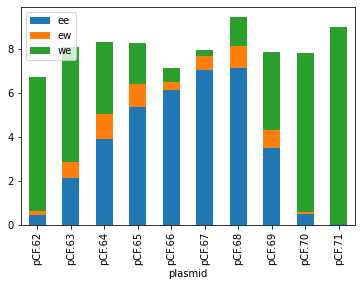

In [138]:
stacked_bar_df_mean.plot(kind='bar', stacked=True)
plt.savefig("test.png")

In [49]:
###

In [ ]:
##calculate summary data
Rep1_Ed_Per = []
Rep2_Ed_Per = []
Rep3_Ed_Per = []

Rep1_No_Region_Per = []
Rep2_No_Region_Per = []
Rep3_No_Region_Per = []

Rep1_No_Site_Per = []
Rep2_No_Site_Per = []
Rep3_No_Site_Per = []

for i in samples.index:
    try:
        Rep1_Ed_Per.append((float(outcomes_dict[i]['Rep1']['edited']) / (outcomes_dict[i]['Rep1']['edited']+outcomes_dict[i]['Rep1']['wt']))*100)
    except ZeroDivisionError:
        Rep1_Ed_Per.append("div0")
    try:
        Rep2_Ed_Per.append((float(outcomes_dict[i]['Rep2']['edited']) / (outcomes_dict[i]['Rep2']['edited']+outcomes_dict[i]['Rep2']['wt']))*100)
    except ZeroDivisionError:
        Rep2_Ed_Per.append("div0")
    try:
        Rep3_Ed_Per.append((float(outcomes_dict[i]['Rep3']['edited']) / (outcomes_dict[i]['Rep3']['edited']+outcomes_dict[i]['Rep3']['wt']))*100)
    except ZeroDivisionError:
        Rep3_Ed_Per.append("div0")
    
    try:
        Rep1_No_Region_Per.append((float(outcomes_dict[i]['Rep1']['unmatched_region']) / (outcomes_dict[i]['Rep1']['edited']+outcomes_dict[i]['Rep1']['wt']+outcomes_dict[i]['Rep1']['unmatched_region']+outcomes_dict[i]['Rep1']['unmatched_edit_nt']))*100)
    except ZeroDivisionError:
        Rep1_No_Region_Per.append("div0")
    try:
        Rep2_No_Region_Per.append((float(outcomes_dict[i]['Rep2']['unmatched_region']) / (outcomes_dict[i]['Rep2']['edited']+outcomes_dict[i]['Rep2']['wt']+outcomes_dict[i]['Rep2']['unmatched_region']+outcomes_dict[i]['Rep2']['unmatched_edit_nt']))*100)
    except ZeroDivisionError:
        Rep2_No_Region_Per.append("div0")
    try:
        Rep3_No_Region_Per.append((float(outcomes_dict[i]['Rep3']['unmatched_region']) / (outcomes_dict[i]['Rep3']['edited']+outcomes_dict[i]['Rep3']['wt']+outcomes_dict[i]['Rep3']['unmatched_region']+outcomes_dict[i]['Rep3']['unmatched_edit_nt']))*100)
    except ZeroDivisionError:
        Rep3_No_Region_Per.append("div0")
    
    try:
        Rep1_No_Site_Per.append((float(outcomes_dict[i]['Rep1']['unmatched_edit_nt']) / (outcomes_dict[i]['Rep1']['edited']+outcomes_dict[i]['Rep1']['wt']+outcomes_dict[i]['Rep1']['unmatched_region']+outcomes_dict[i]['Rep1']['unmatched_edit_nt']))*100)
    except ZeroDivisionError:
        Rep1_No_Site_Per.append("div0")
    try:    
        Rep2_No_Site_Per.append((float(outcomes_dict[i]['Rep2']['unmatched_edit_nt']) / (outcomes_dict[i]['Rep2']['edited']+outcomes_dict[i]['Rep2']['wt']+outcomes_dict[i]['Rep2']['unmatched_region']+outcomes_dict[i]['Rep2']['unmatched_edit_nt']))*100)
    except ZeroDivisionError:
        Rep2_No_Site_Per.append("div0")
    try:
        Rep3_No_Site_Per.append((float(outcomes_dict[i]['Rep3']['unmatched_edit_nt']) / (outcomes_dict[i]['Rep3']['edited']+outcomes_dict[i]['Rep3']['wt']+outcomes_dict[i]['Rep3']['unmatched_region']+outcomes_dict[i]['Rep3']['unmatched_edit_nt']))*100)
    except ZeroDivisionError:
        Rep3_No_Site_Per.append("div0")

In [ ]:
samples_updated = samples.assign(Rep1_Edit_Percent=Rep1_Ed_Per, 
                                 Rep2_Edit_Percent=Rep2_Ed_Per, 
                                 Rep3_Edit_Percent=Rep3_Ed_Per,
                                 _R1_No_Region_Match_Percent=Rep1_No_Region_Per,
                                 _R2_No_Region_Match_Percent=Rep2_No_Region_Per,
                                 _R3_No_Region_Match_Percent=Rep3_No_Region_Per,
                                 __R1_No_Site_Match_Percent=Rep1_No_Site_Per,
                                 __R2_No_Site_Match_Percent=Rep2_No_Site_Per,
                                 __R3_No_Site_Match_Percent=Rep3_No_Site_Per)

In [ ]:
samples_updated

In [ ]:
##graph it

In [ ]:
##output
samples_updated.to_excel("editing_analysis_output.xlsx")